In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Read all patients at once

In [2]:
dataframe = pd.DataFrame()
for i in range(0,70):
    df = pd.read_csv('data/Diabetes-Data/data-01', 
                   names=['Date','Time','Code','Value'],
                   sep='\t', header=None)
    df['patient_id'] = (i+1)
    dataframe = dataframe.append(df)

In [3]:
dataframe.sample(5)

,Date,Time,Code,Value,patient_id
428,06-20-1991,17:50,62,66,44
259,05-29-1991,13:25,33,4,55
187,05-18-1991,16:45,62,104,66
208,05-22-1991,7:32,33,9,24
323,06-07-1991,8:35,34,16,26


The Code field is deciphered as follows:

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event

In [37]:
#
print('Codes present for this patient: {}'.format(dataframe['Code'].unique()))

Codes present for this patient: [58 33 34 62 48 65 60]


In [13]:
REGULAR_INSULIN_DOSE_CD = 33
NPH_INSULIN_DOSE_CD = 34
ULTRALENTE_INSULIN_DOSE_CD = 35

PRE_BRKFAST_BG_CD = 58
POST_BRKFAST_BG_CD = 59

PRE_LUNCH_BG_CD = 60
POST_LUNCH_BG_CD = 61

PRE_SUPPER_BG_CD = 62
POST_SUPPER_BG_CD = 63

PRE_SNACK_BG_CD = 64

LESS_EXERCISE_ACTIVITY = 71
MORE_EXERCISE_ACTIVITY = 70

In [5]:
dataframe['TimeStamp'] = pd.to_datetime(dataframe['Date'] + ' ' + dataframe['Time'])

Let's see how has been the Regular Insulin dosage on Patient 1

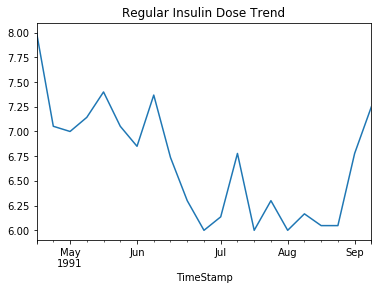

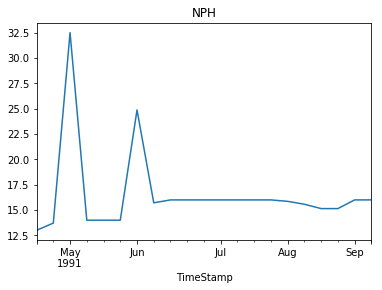

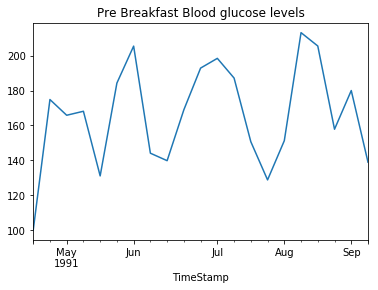

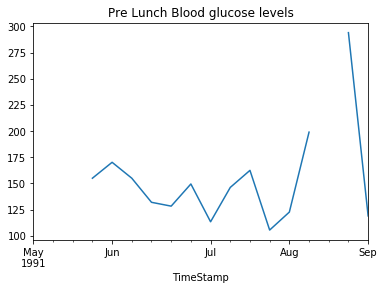

In [41]:
dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==REGULAR_INSULIN_DOSE_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='Regular Insulin Dose Trend')

plt.show()

dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==NPH_INSULIN_DOSE_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='NPH')


plt.show()

dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==PRE_BRKFAST_BG_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='Pre Breakfast Blood glucose levels')


plt.show()

dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==PRE_LUNCH_BG_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='Pre Lunch Blood glucose levels')


plt.show()

In [9]:
insulin_dosage = dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==REGULAR_INSULIN_DOSE_CD)].set_index('TimeStamp')['Value'].resample('W').mean().values

pre_brkfst_readings = dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==PRE_BRKFAST_BG_CD)].set_index('TimeStamp')['Value'].resample('W').mean().values


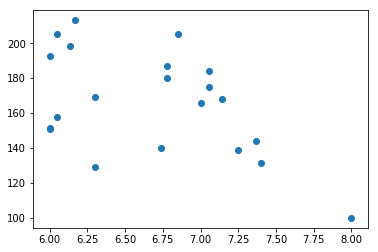

In [12]:
plt.scatter(insulin_dosage, pre_brkfst_readings)

In [27]:
dataframe.shape

(66010, 6)

array([58, 33, 34, 62, 48, 65, 60])